## Linear Regression with Sines & Cosines

- Load the Joe Biden, Donald Trump Polls
- Build the Dataframe, as done previously
- Add sines and cosines of certain periods
- Build a regression model for each candidate!

In [1]:
from realclearpolling import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Load in the Data

In [2]:
#Load in the joe biden, donald trump data
df = clean_data(get_poll_data())
df.head()

,pollster,date,sample,moe,Trump (R),Biden (D),spread,Difference,Type of Voter,Sample Size,End Date,Poll Month,Year,Days Since 01-01-23
0,Emerson,4/16 - 4/17,1308 RV,2.6,46.0,43.0,Trump+3,3.0,RV,1308,2024-04-17,4,2024,472
1,Daily Kos/Civiqs,4/13 - 4/16,1161 RV,3.0,45.0,44.0,Trump+1,1.0,RV,1161,2024-04-16,4,2024,471
2,Yahoo News,4/11 - 4/15,1171 RV,—,44.0,44.0,Tie,0.0,RV,1171,2024-04-15,4,2024,470
3,NY Times/Siena,4/7 - 4/11,1059 LV,3.5,47.0,46.0,Trump+1,1.0,LV,1059,2024-04-11,4,2024,466
4,Morning Consult,4/5 - 4/7,6236 RV,1.0,44.0,43.0,Trump+1,1.0,RV,6236,2024-04-07,4,2024,462


## Add Sines and Cosines to Scale the Data

In [3]:
# Add sines and cosines of the day of the year to the data
scale = 365
days = df["Days Since 01-01-23"]
#Define some initial frequencies
frequencies = [i*2 for i in range(1, 10)]
def add_sine_cosine(df, freq, scale):
    df['sinfreq' + str(freq)] = np.sin(freq *np.pi*days/scale)
    df['cosfreq' + str(freq)] = np.cos(freq*np.pi*days/scale)
for freq in frequencies:
    add_sine_cosine(df, freq, scale)
frequency_strings = ['sinfreq' + str(freq) for freq in frequencies] + ['cosfreq' + str(freq) for freq in frequencies]
frequency_strings.append("Days Since 01-01-23")
#Display the data with new frequencies
df.head()

,pollster,date,sample,moe,Trump (R),Biden (D),spread,Difference,Type of Voter,Sample Size,...,sinfreq10,cosfreq10,sinfreq12,cosfreq12,sinfreq14,cosfreq14,sinfreq16,cosfreq16,sinfreq18,cosfreq18
0,Emerson,4/16 - 4/17,1308 RV,2.6,46.0,43.0,Trump+3,3.0,RV,1308,...,0.213521,-0.976938,-0.998435,0.055917,0.321270,0.946988,0.826354,-0.563151,-0.763889,-0.645348
1,Daily Kos/Civiqs,4/13 - 4/16,1161 RV,3.0,45.0,44.0,Trump+1,1.0,RV,1161,...,0.296713,-0.954967,-0.998880,-0.047321,0.205104,0.978740,0.895839,-0.444378,-0.655156,-0.755493
2,Yahoo News,4/11 - 4/15,1171 RV,—,44.0,44.0,Tie,0.0,RV,1171,...,0.377708,-0.925925,-0.988678,-0.150055,0.085965,0.996298,0.948362,-0.317191,-0.530730,-0.847541
3,NY Times/Siena,4/7 - 4/11,1059 LV,3.5,47.0,46.0,Trump+1,1.0,LV,1059,...,0.668064,-0.744104,-0.845249,-0.534373,-0.385663,0.922640,0.974100,0.226116,0.060213,-0.998186
4,Morning Consult,4/5 - 4/7,6236 RV,1.0,44.0,43.0,Trump+1,1.0,RV,6236,...,0.880012,-0.474951,-0.559589,-0.828770,-0.769415,0.638749,0.711657,0.702527,0.628763,-0.777597


## Build the Training Dataset

- This first training dataset does not depend on the polling company.

In [4]:
# We'll use the pollster, sine and cosine of the day of the year as features
X = df[frequency_strings]
X = pd.get_dummies(X, drop_first=True)
jby = df["Biden (D)"]
dty = df["Trump (R)"]

X.head()

,sinfreq2,sinfreq4,sinfreq6,sinfreq8,sinfreq10,sinfreq12,sinfreq14,sinfreq16,sinfreq18,cosfreq2,cosfreq4,cosfreq6,cosfreq8,cosfreq10,cosfreq12,cosfreq14,cosfreq16,cosfreq18,Days Since 01-01-23
0,0.963471,-0.516062,-0.687053,0.884068,0.213521,-0.998435,0.321270,0.826354,-0.763889,-0.267814,-0.856551,0.726608,0.467359,-0.976938,0.055917,0.946988,-0.563151,-0.645348,472
1,0.967938,-0.486273,-0.723644,0.849817,0.296713,-0.998880,0.205104,0.895839,-0.655156,-0.251190,-0.873807,0.690173,0.527078,-0.954967,-0.047321,0.978740,-0.444378,-0.755493,471
2,0.972118,-0.455907,-0.758306,0.811539,0.377708,-0.988678,0.085965,0.948362,-0.530730,-0.234491,-0.890028,0.651899,0.584298,-0.925925,-0.150055,0.996298,-0.317191,-0.847541,470
3,0.985948,-0.329408,-0.875892,0.622047,0.668064,-0.845249,-0.385663,0.974100,0.060213,-0.167052,-0.944188,0.482508,0.782980,-0.744104,-0.534373,0.922640,0.226116,-0.998186,466
4,0.995105,-0.196673,-0.956235,0.385663,0.880012,-0.559589,-0.769415,0.711657,0.628763,-0.098820,-0.980469,0.292600,0.922640,-0.474951,-0.828770,0.638749,0.702527,-0.777597,462


## Build Linear Regression Models for Each Candidate

- Again, these linear regression models are only dependent on the date of the poll, and not the polling company.

In [5]:
# Joe Biden Model
jbmodel = LinearRegression()
jbmodel.fit(X, jby)
jbpredictions = jbmodel.predict(X) 
# Donald Trump Model
dtmodel = LinearRegression()
dtmodel.fit(X, dty)
dtpredictions = dtmodel.predict(X)


## Plot the Predictions in Comparison to the Actual Poll Numbers

- Here is what the predictions look like without taking into account the company who released the poll.

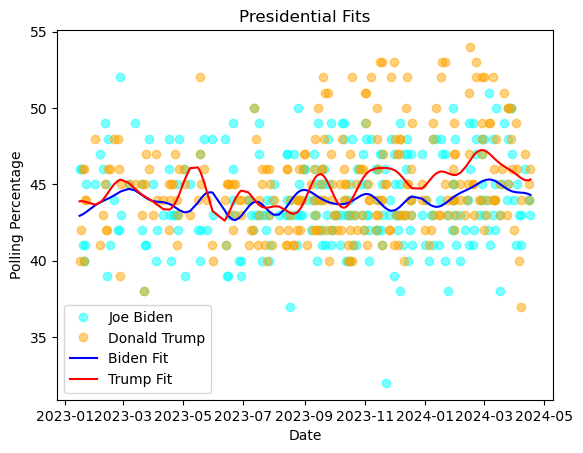

In [6]:
#Is it possible to subset the predictions to only include the unique dates?
dates = df["End Date"]
unique_dates = np.unique(dates)
unique_jbpredictions = []
unique_dtpredictions = []
for date in unique_dates:
    unique_jbpredictions.append(jbpredictions[dates == date].mean())
    unique_dtpredictions.append(dtpredictions[dates == date].mean())
plt.plot(dates, jby, 'o', label='Joe Biden', alpha = 0.5, color = 'aqua')
plt.plot(dates, dty, 'o', label='Donald Trump', alpha = 0.5, color = 'orange')
plt.plot(unique_dates, unique_jbpredictions, label='Biden Fit', color = 'blue')
plt.plot(unique_dates, unique_dtpredictions, label='Trump Fit', color = 'red')
plt.xlabel('Date')
plt.ylabel('Polling Percentage')
plt.title('Presidential Fits')
plt.legend()
plt.show()

# Create a new Model

- Now we will explicitly add the poll company as a predictor.
- We start by building a new training dataframe

In [7]:
#Create the training df
frequency_strings.append("pollster")
X = df[frequency_strings]
X = pd.get_dummies(X, drop_first=True)
train_df = X.copy()
#Example polling company
poll_company = "pollster_YouGov/Economist"
pollsters = [col for col in train_df.columns if 'pollster' in col]

train_df.head()

,sinfreq2,sinfreq4,sinfreq6,sinfreq8,sinfreq10,sinfreq12,sinfreq14,sinfreq16,sinfreq18,cosfreq2,...,pollster_Rasmussen Reports,pollster_Reuters/Ipsos,pollster_SurveyUSA,pollster_Susquehanna,pollster_The Messenger/HarrisX,pollster_Trafalgar Group (R),pollster_USA Today/Suffolk,pollster_Wall Street Journal,pollster_Yahoo News,pollster_Yahoo News**
0,0.963471,-0.516062,-0.687053,0.884068,0.213521,-0.998435,0.321270,0.826354,-0.763889,-0.267814,...,False,False,False,False,False,False,False,False,False,False
1,0.967938,-0.486273,-0.723644,0.849817,0.296713,-0.998880,0.205104,0.895839,-0.655156,-0.251190,...,False,False,False,False,False,False,False,False,False,False
2,0.972118,-0.455907,-0.758306,0.811539,0.377708,-0.988678,0.085965,0.948362,-0.530730,-0.234491,...,False,False,False,False,False,False,False,False,True,False
3,0.985948,-0.329408,-0.875892,0.622047,0.668064,-0.845249,-0.385663,0.974100,0.060213,-0.167052,...,False,False,False,False,False,False,False,False,False,False
4,0.995105,-0.196673,-0.956235,0.385663,0.880012,-0.559589,-0.769415,0.711657,0.628763,-0.098820,...,False,False,False,False,False,False,False,False,False,False


# Train the new models

In [8]:
jbmodel = LinearRegression(fit_intercept=False)
jbmodel.fit(train_df, jby)


dtmodel = LinearRegression(fit_intercept=False)
dtmodel.fit(train_df, dty)


LinearRegression(fit_intercept=False)

# Make a prediction dataframe

- We are interested in predicting the polls from a specific polling company at a time.
- Since poll company is a categorical variable, we need to have dummy columns. 
- We set the poll company of interest to True, while the remaining poll companies are set to false.

In [9]:
def craft_prediction_df(poll_company = "pollster_NY Times/Siena",frequencies = [i*2 for i in range(1, 10)]):
    prediction_df = pd.DataFrame()

    days = list(range(1,430))
    prediction_df["Days Since 01-01-23"] = days 

    for freq in frequencies:
        sine_name = 'sinfreq' + str(freq)
        cos_name = 'cosfreq' + str(freq)
        prediction_df[sine_name] = np.sin(freq *np.pi* prediction_df["Days Since 01-01-23"]/scale)
        prediction_df[cos_name] = np.cos(freq*np.pi* prediction_df["Days Since 01-01-23"]/scale)

    for pollster in pollsters:
        prediction_df[pollster] = False 
    
    prediction_df[poll_company] = True
    prediction_df = prediction_df[X.columns]
    return prediction_df

prediction_df = craft_prediction_df()
prediction_df.head()


,sinfreq2,sinfreq4,sinfreq6,sinfreq8,sinfreq10,sinfreq12,sinfreq14,sinfreq16,sinfreq18,cosfreq2,...,pollster_Rasmussen Reports,pollster_Reuters/Ipsos,pollster_SurveyUSA,pollster_Susquehanna,pollster_The Messenger/HarrisX,pollster_Trafalgar Group (R),pollster_USA Today/Suffolk,pollster_Wall Street Journal,pollster_Yahoo News,pollster_Yahoo News**
0,0.017213,0.034422,0.051620,0.068802,0.085965,0.103102,0.120208,0.137279,0.154309,0.999852,...,False,False,False,False,False,False,False,False,False,False
1,0.034422,0.068802,0.103102,0.137279,0.171293,0.205104,0.238673,0.271958,0.304921,0.999407,...,False,False,False,False,False,False,False,False,False,False
2,0.051620,0.103102,0.154309,0.205104,0.255353,0.304921,0.353676,0.401488,0.448229,0.998667,...,False,False,False,False,False,False,False,False,False,False
3,0.068802,0.137279,0.205104,0.271958,0.337523,0.401488,0.463550,0.523416,0.580800,0.997630,...,False,False,False,False,False,False,False,False,False,False
4,0.085965,0.171293,0.255353,0.337523,0.417194,0.493776,0.566702,0.635432,0.699458,0.996298,...,False,False,False,False,False,False,False,False,False,False


## Make the predictions

In [10]:
jbpredictions = jbmodel.predict(prediction_df)
dtpredictions = dtmodel.predict(prediction_df)

## Example Output

- Here is what the NYT polls have been predicted to be since 2023, as according to our model.

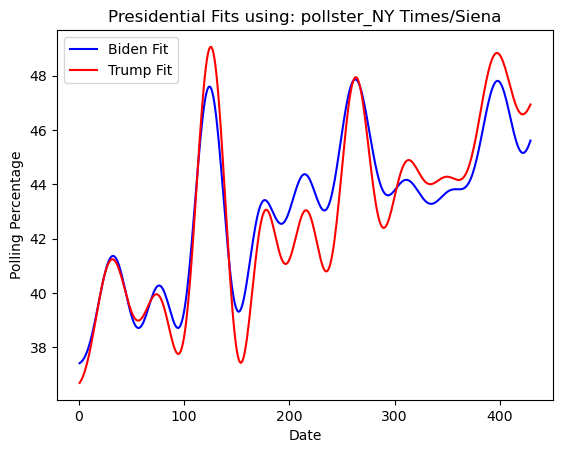

In [11]:
def plot_predictions(jbpredictions, dtpredictions, prediction_df,poll_company = "pollster_NY Times/Siena"):
    dates = prediction_df["Days Since 01-01-23"]
    unique_dates = np.unique(dates)
    unique_jbpredictions = []
    unique_dtpredictions = []
    for date in unique_dates:
        unique_jbpredictions.append(jbpredictions[dates == date].mean())
        unique_dtpredictions.append(dtpredictions[dates == date].mean())
    plt.plot(dates, jbpredictions, label='Biden Fit', color = 'blue')
    plt.plot(dates, dtpredictions, label='Trump Fit', color = 'red')
    plt.xlabel('Date')
    plt.ylabel('Polling Percentage')
    plt.title('Presidential Fits using: ' + poll_company)
    plt.legend()
    plt.show()

plot_predictions(jbpredictions, dtpredictions, prediction_df)


## We do the same with a more conservative polling company

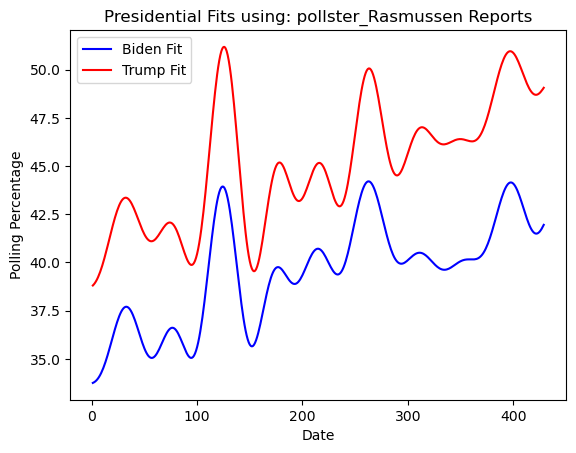

In [12]:
prediction_df = craft_prediction_df(poll_company = "pollster_Rasmussen Reports")
jbpredictions = jbmodel.predict(prediction_df)
dtpredictions = dtmodel.predict(prediction_df)
plot_predictions(jbpredictions, dtpredictions, prediction_df, poll_company = "pollster_Rasmussen Reports")

## Again, using a more "median" polling company

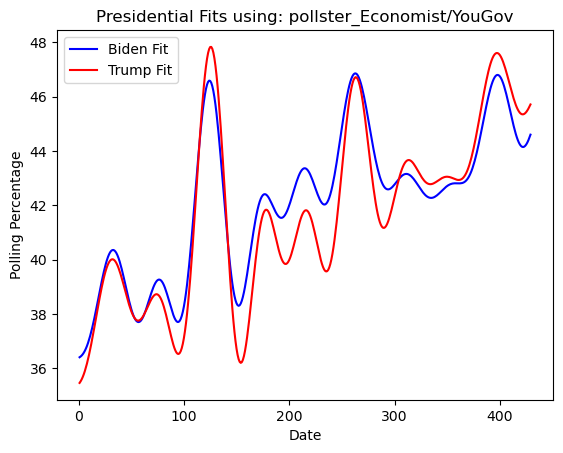

In [13]:
#Choose a "median" pollster like YouGov
poll_company = "pollster_Economist/YouGov"
prediction_df = craft_prediction_df(poll_company)
jbpredictions = jbmodel.predict(prediction_df)
dtpredictions = dtmodel.predict(prediction_df)
plot_predictions(jbpredictions, dtpredictions, prediction_df, poll_company = poll_company)

## Ridge Regression

- Linear regression is not always the most optimized modelling technique. 
- Let's try using ridge regression with a custom penalty matrix to tamp down some of the higher frequency coefficients. 

Here is the formula for ridge regression:
$(X^TX+D)^{-1} X^Ty$


In [14]:
#We need to create a matrix D that penalizes the coefficients
def calculate_penalty(alpha,tau,col_name):
    #Get the frequency from the column name
    if "sinfreq" in col_name:
        freq = int(col_name[7:])
    elif "cosfreq" in col_name:
        freq = int(col_name[7:])
    else:
        return 0
    return np.exp(-freq/alpha)*(tau**2)

def penalty_coefficient(alpha,tau, df):
    #Create an n x n matrix
    D = np.zeros((len(df.T), len(df.T)))
    #Fill in the diagonal with alpha and tau
    for i in range(len(df.T)):
        D[i,i] = calculate_penalty(alpha,tau,df.columns[i])
    return D

D = penalty_coefficient(30,10, X)

In [15]:
#Calculate the above equation
#(X^T X + D)^-1 X^T y
XNew = np.matrix(train_df).astype(float)
D = np.matrix(D)
#Coeffients for Joe Biden
jb_model= np.linalg.inv(XNew.T @ XNew + D) @ XNew.T @ jby
#Coefficients for Donald Trump
dt_model = np.linalg.inv(XNew.T @ XNew + D) @ XNew.T @ dty

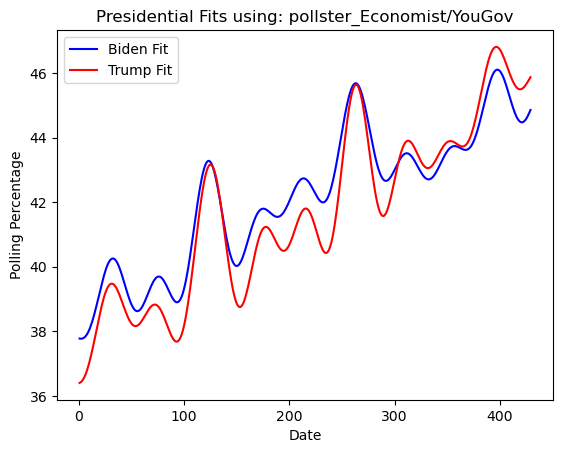

In [16]:
#Make a prediction
jbpredictions = prediction_df.values.astype(np.float64) @ jb_model
dtpredictions = prediction_df.values.astype(np.float64) @ dt_model

#Plot the predictions
plot_predictions(jbpredictions, dtpredictions, prediction_df, poll_company = poll_company)


## Find Median Coefficient/Use that Poll

- Write some infrastructure to evaluate predictions. 
- Check how our "next-day" polling predictions. Compare to the betting data.
- How much "value added" by giving the real-time (prior-day) betting data. 
- Adjust the models to only differ on betting data. 
- Add sinfreq and cosfreq

## Finding the Median Poll

In [17]:
#Find the median Joe Biden Coefficient Model
sorted_jb = np.argsort(jb_model)
med = sorted_jb[len(jb_model)//2]
print(med)
jb_model[med]

#Find the median Donald Trump Coefficient Model
sorted_dt = np.argsort(dt_model)
med = sorted_dt[len(dt_model)//2]
print(med)
dt_model[med]

#What is poll med
train_df.columns[med]

20
20


'pollster_CNBC'

## Median Poll Plot

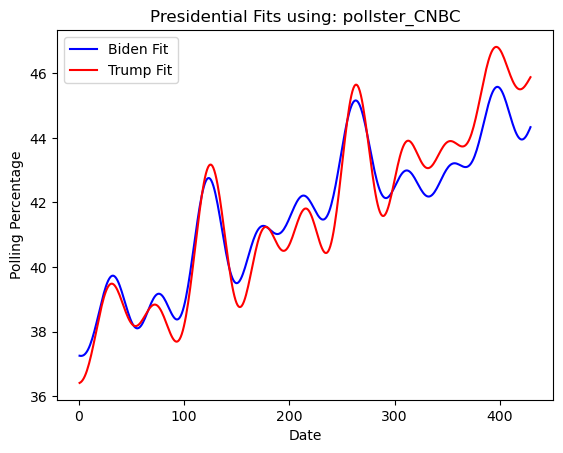

In [18]:
poll_company = train_df.columns[med]
prediction_df = craft_prediction_df(poll_company)
jbpredictions = prediction_df.values.astype(np.float64) @ jb_model
dtpredictions = prediction_df.values.astype(np.float64) @ dt_model
plot_predictions(jbpredictions, dtpredictions, prediction_df, poll_company = poll_company)